In [3]:
%matplotlib inline
from preamble import *

## Supervised Learning
### Classification and Regression

### Generalization, Overfitting and Underfitting

If a model is able to make accurate predictions on unseen data, we say it is able to **generalize** from the training set to the test set.

We want to build a model that is able to generalize as accurately as possible.

If the training and test sets have enough in common, we expect the model to also be accurate on the test set.

Example given below, **We want to predict, whether a customer will buy a boat?**


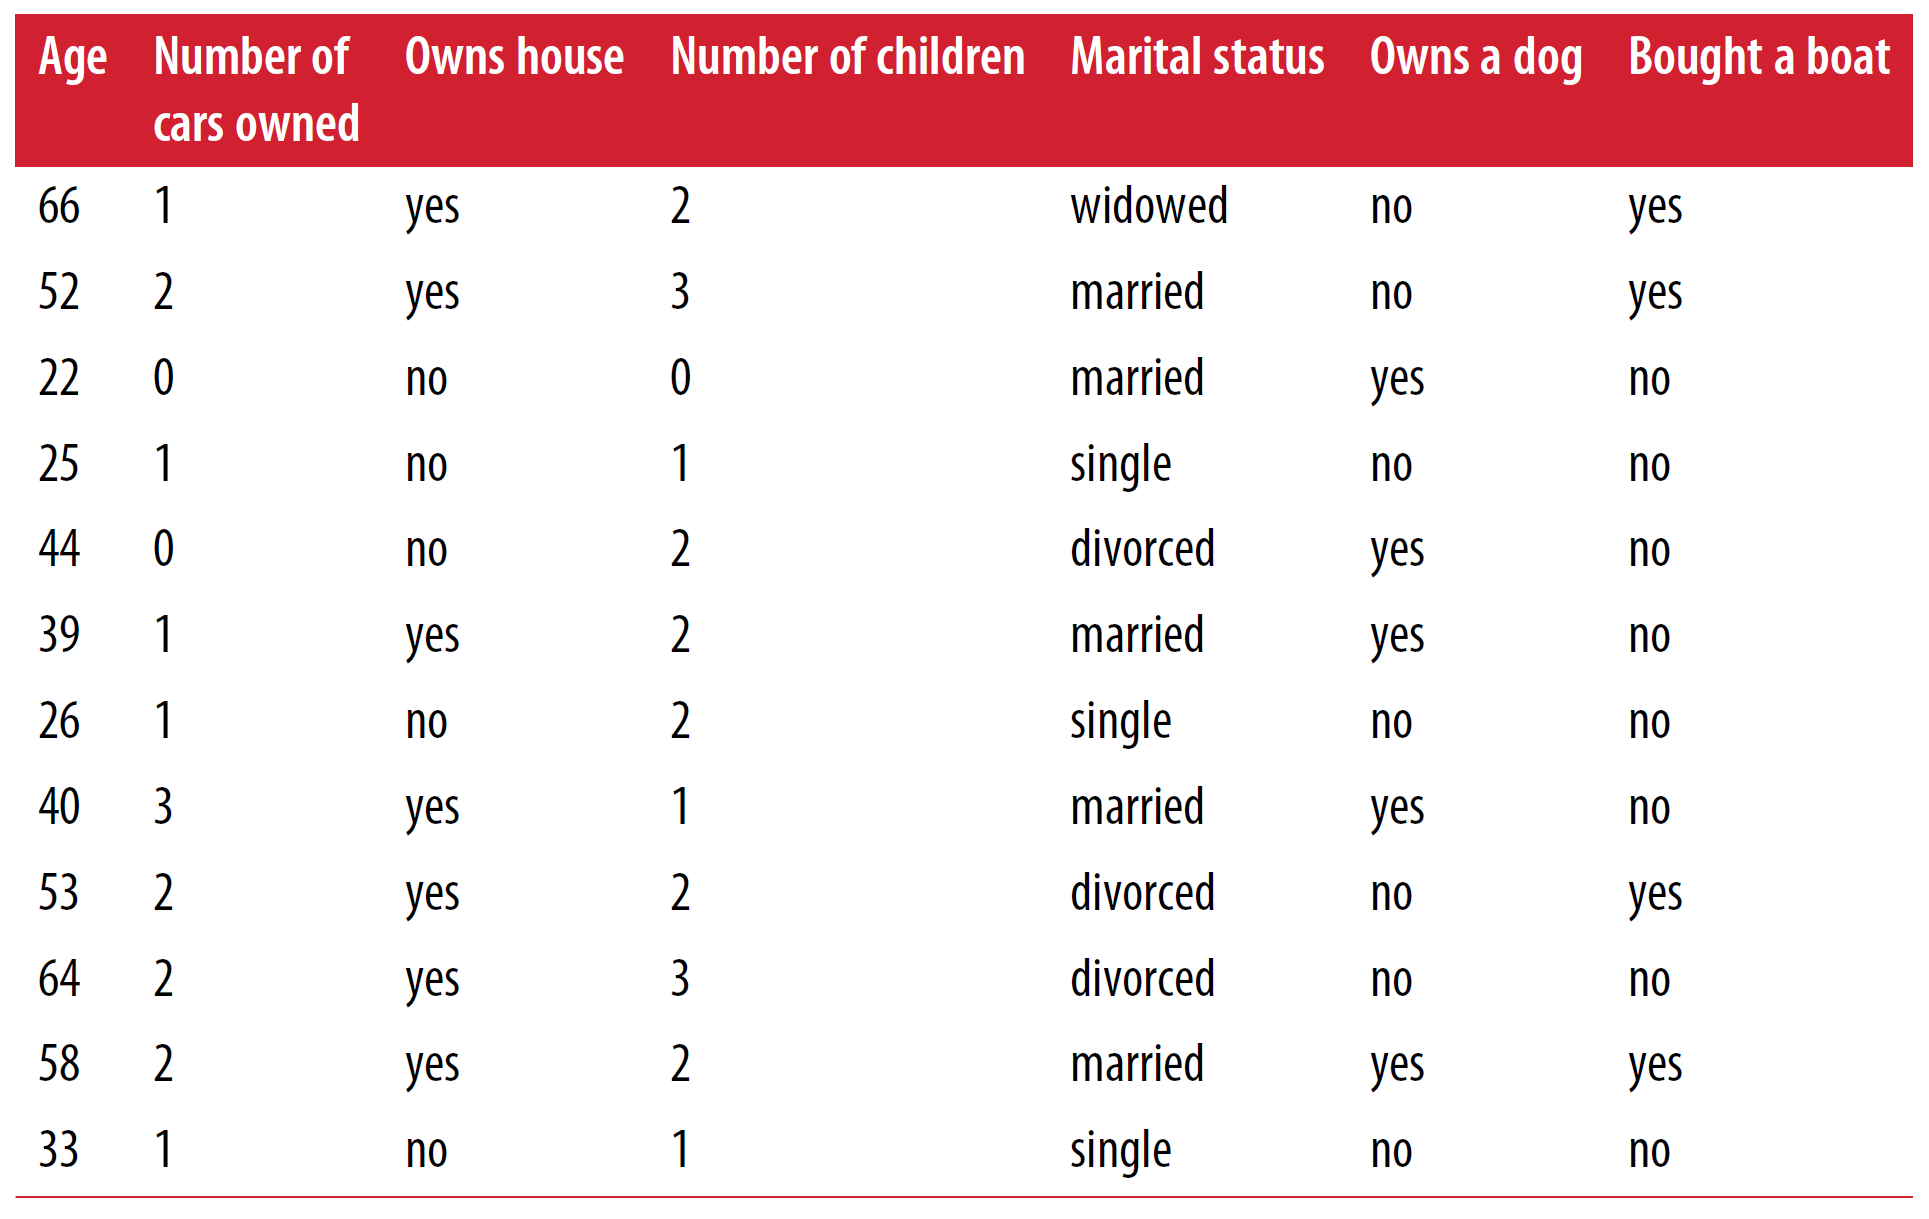

One possible rule is
- “If the customer is older than 45, and has less than 3 children or is not divorced, then they want to buy a boat.” 

We could also say
- No age appears twice in the data, so we could say people who are 66, 52, 53, or 58 years old want to buy a boat, while all others don’t.

We want to find a rule that will work well for new customers, and achieving 100 percent accuracy on the training set.

Intuitively, we expect simple models to generalize better to new data. If the rule was 
- “People older than 50 want to buy a boat,”

Therefore, we always want to find the simplest model.

Building a model that is too complex for the amount of information we have, as our first rule, is called **overfitting**.

Overfitting occurs when you fit a model too closely to the particularities of the training set and obtain a model that works well on the training set but is not able to generalize to new data.

On the other hand, if your model is too simple—say,
- “Everybody who owns a house buys a boat”

then you might not be able to capture all the aspects of and variability in the data, and your model will do badly even on the training set. Choosing too simple a model is called **underfitting**.


![model_complexity](images/overfitting_underfitting_cartoon.png)
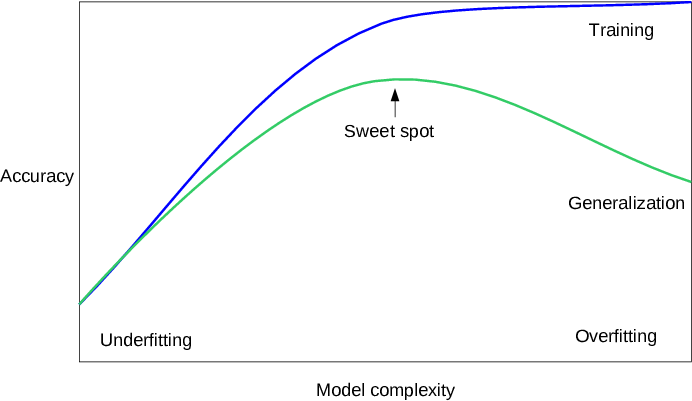

#### Relation of Model Complexity to Dataset Size

The larger variety of data points your dataset contains, the more complex a model you can use without overfitting. 

Usually, collecting more data points will yield more variety, so larger datasets allow building more complex models.

** Larger data sets --> More variabilitiy --> We can build more complex models **

### Supervised Machine Learning Algorithms
##### Some Sample Datasets

X.shape: (26, 2)


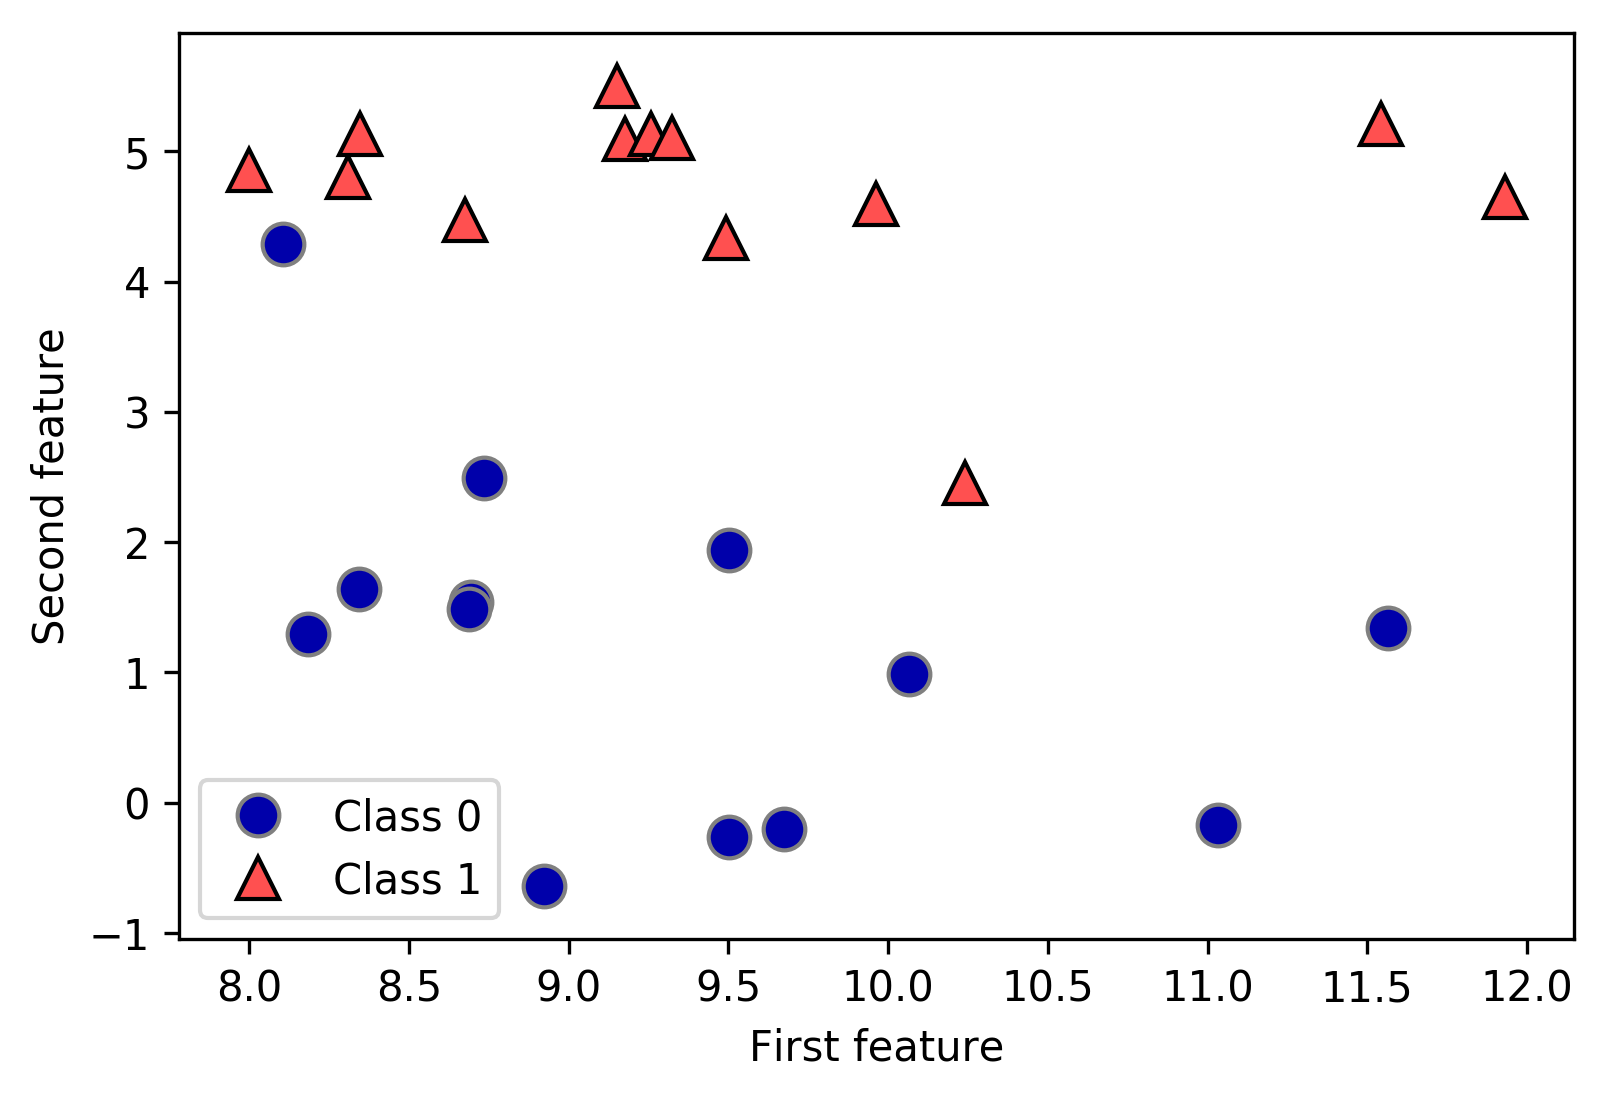

In [18]:
# Forge dataset for two class classification
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
#mglearn.discrete_scatter(X[0], X[1], y)
plt.legend(["Class 0", "Class 1"], loc=3)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

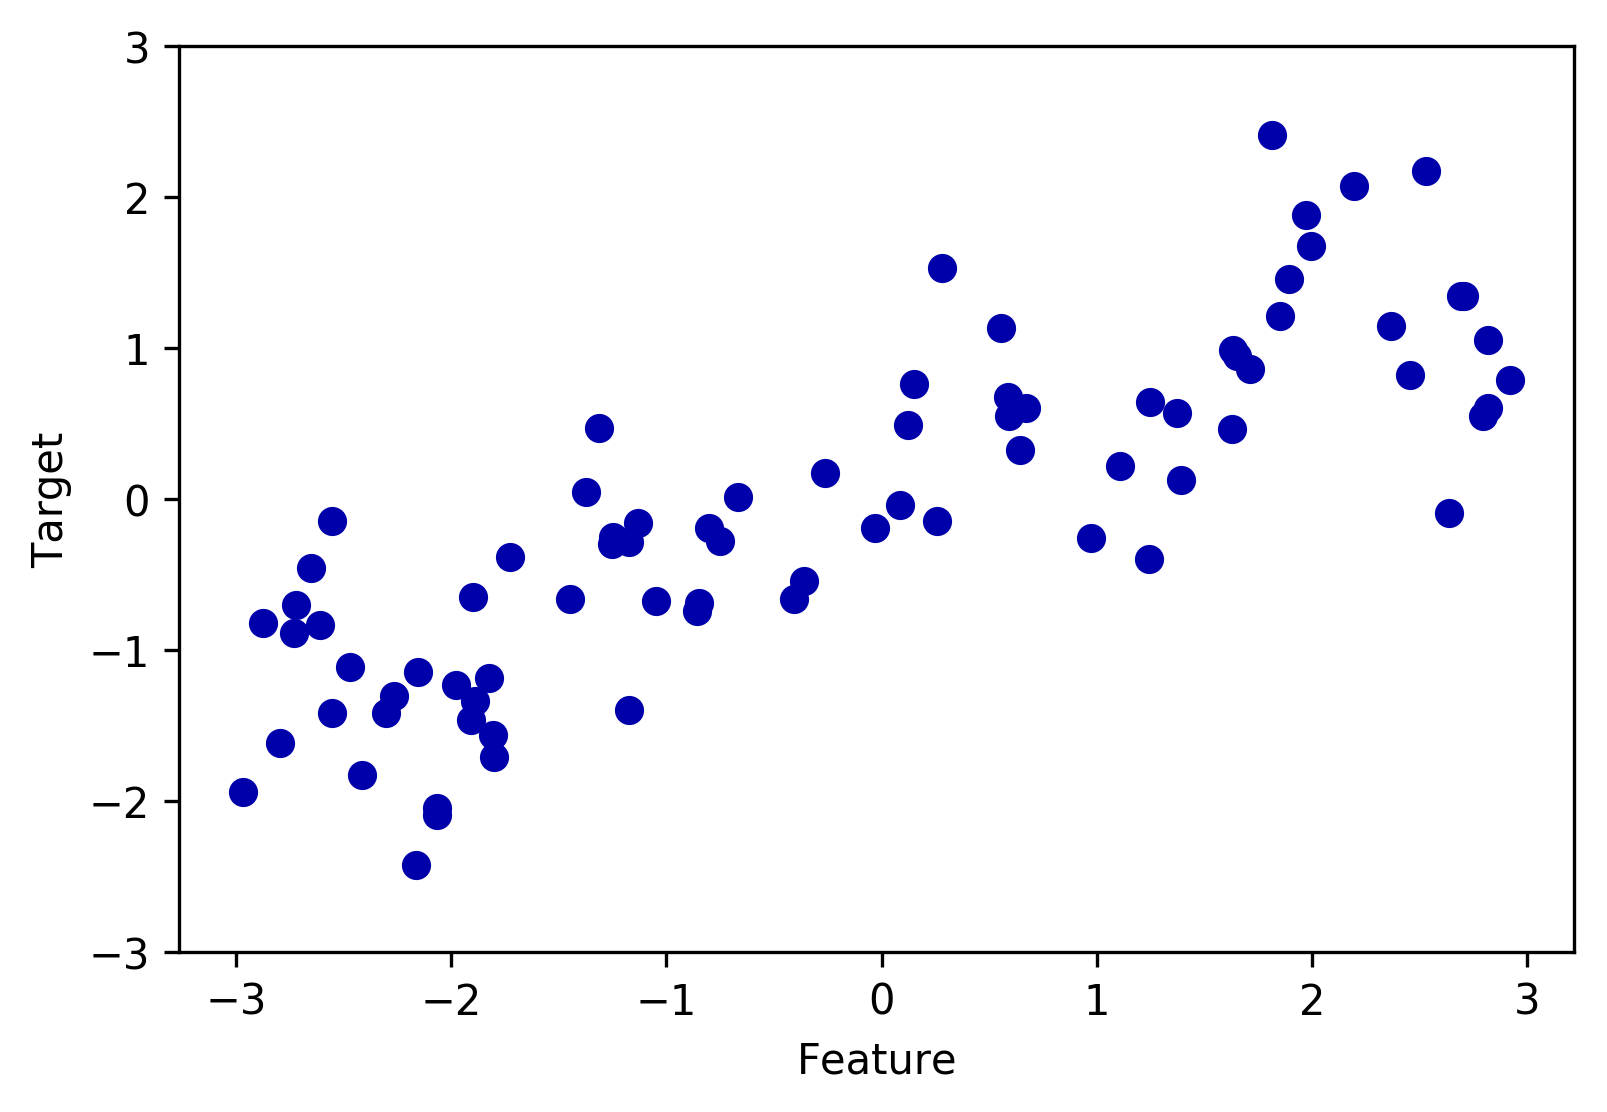

In [22]:
# Wave dataset for regression problem
X, y = mglearn.datasets.make_wave(n_samples=80)
plt.scatter(X, y, marker='o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [23]:
# Real dataset for classsification
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys: {}".format(cancer.keys()))
np.bincount(cancer.target)

cancer.keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


array([212, 357], dtype=int64)

In [15]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [38]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
#print(cancer.target_names)
#print(np.bincount(cancer.target))
#type({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
#len(cancer.target[cancer.target==0])

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [39]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [40]:
# Another real dataset for regression
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [41]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### k-Nearest Neighbor
#### k-Neighbors Classification

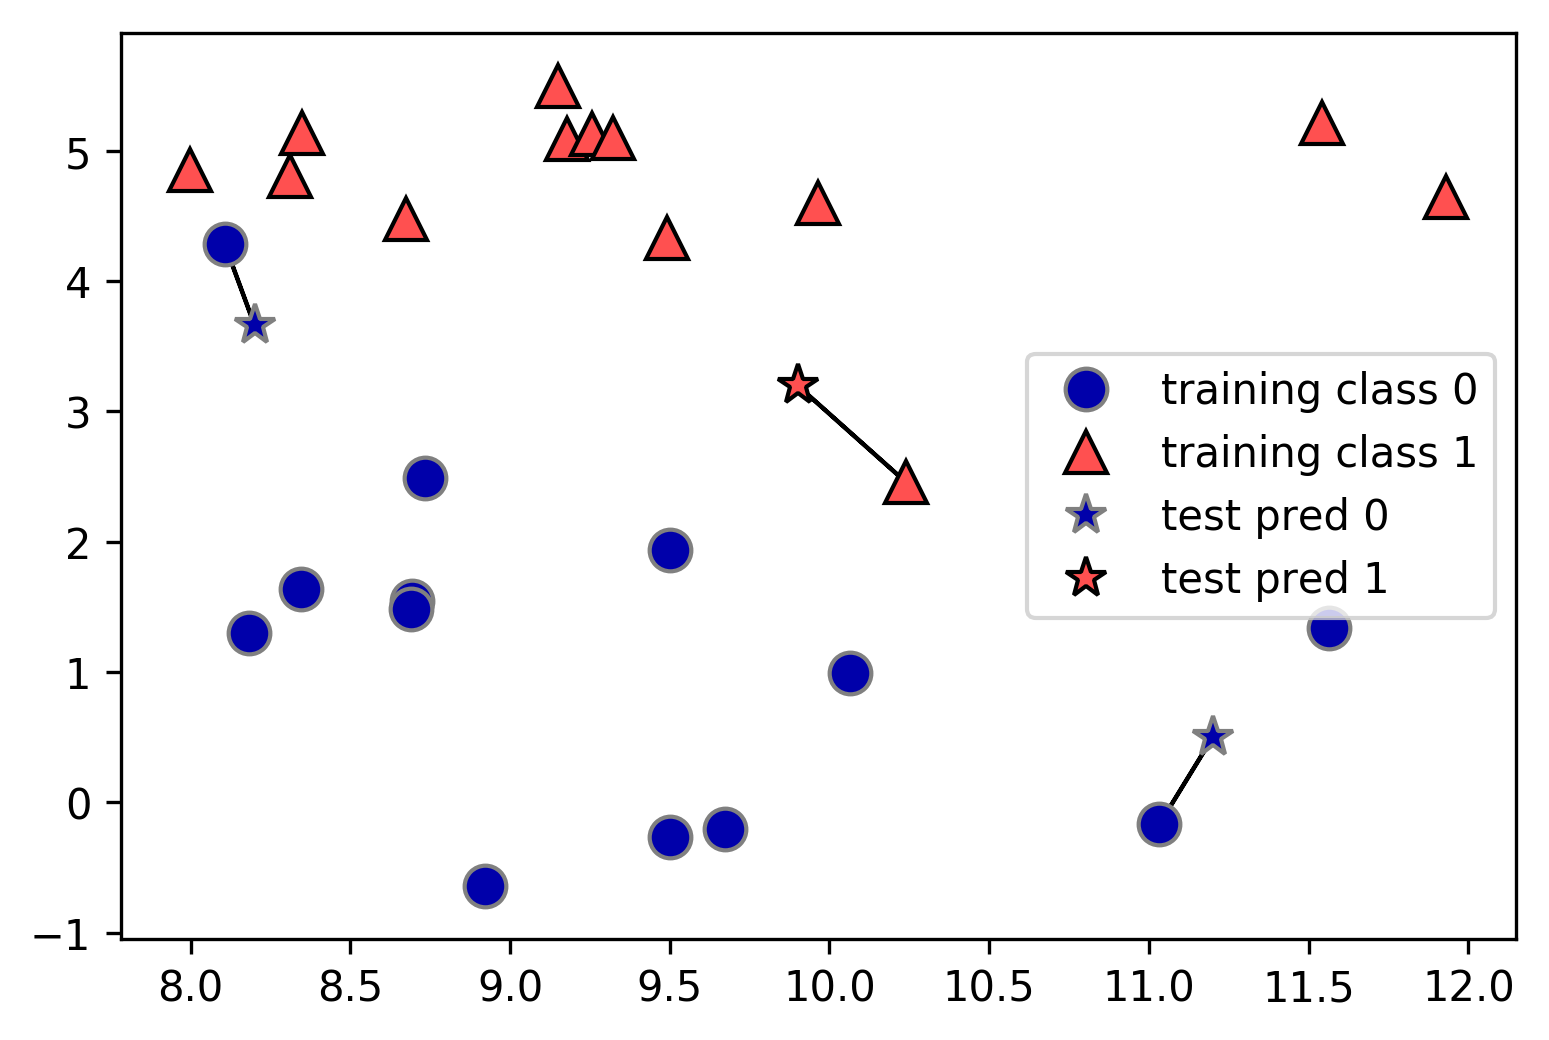

In [42]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

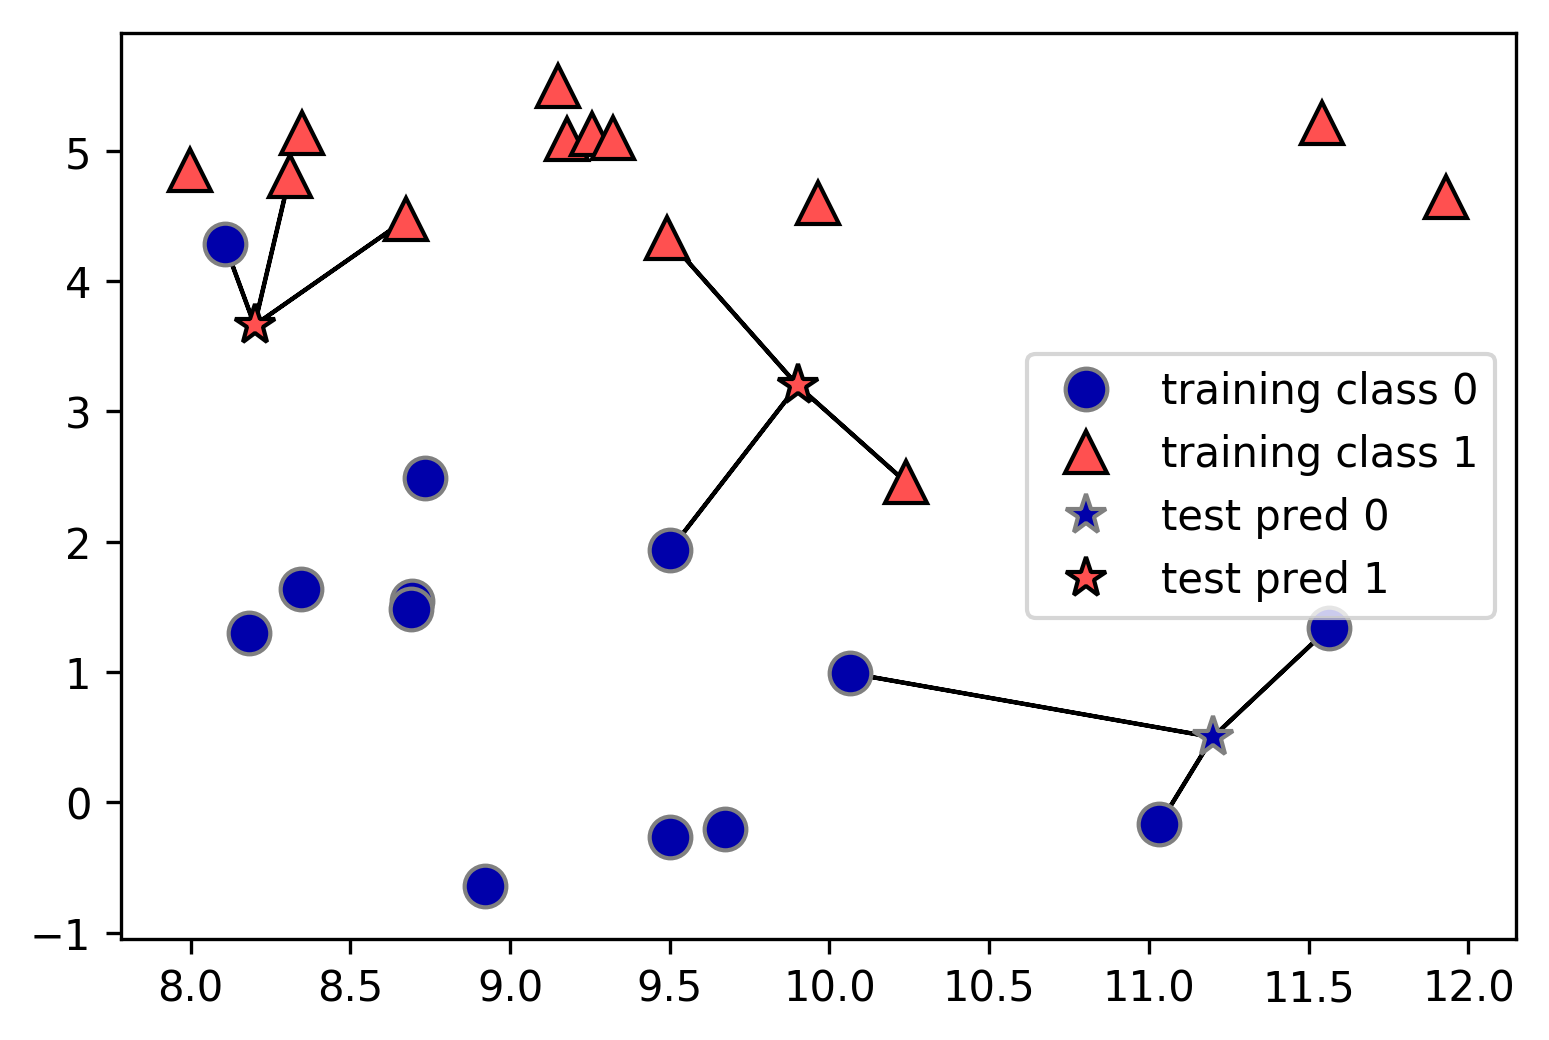

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [54]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5,train_size=0.8)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [56]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [57]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [0 1 1 0 0 1]


In [58]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.83


##### Analyzing KNeighborsClassifier

**Decision Boundary**

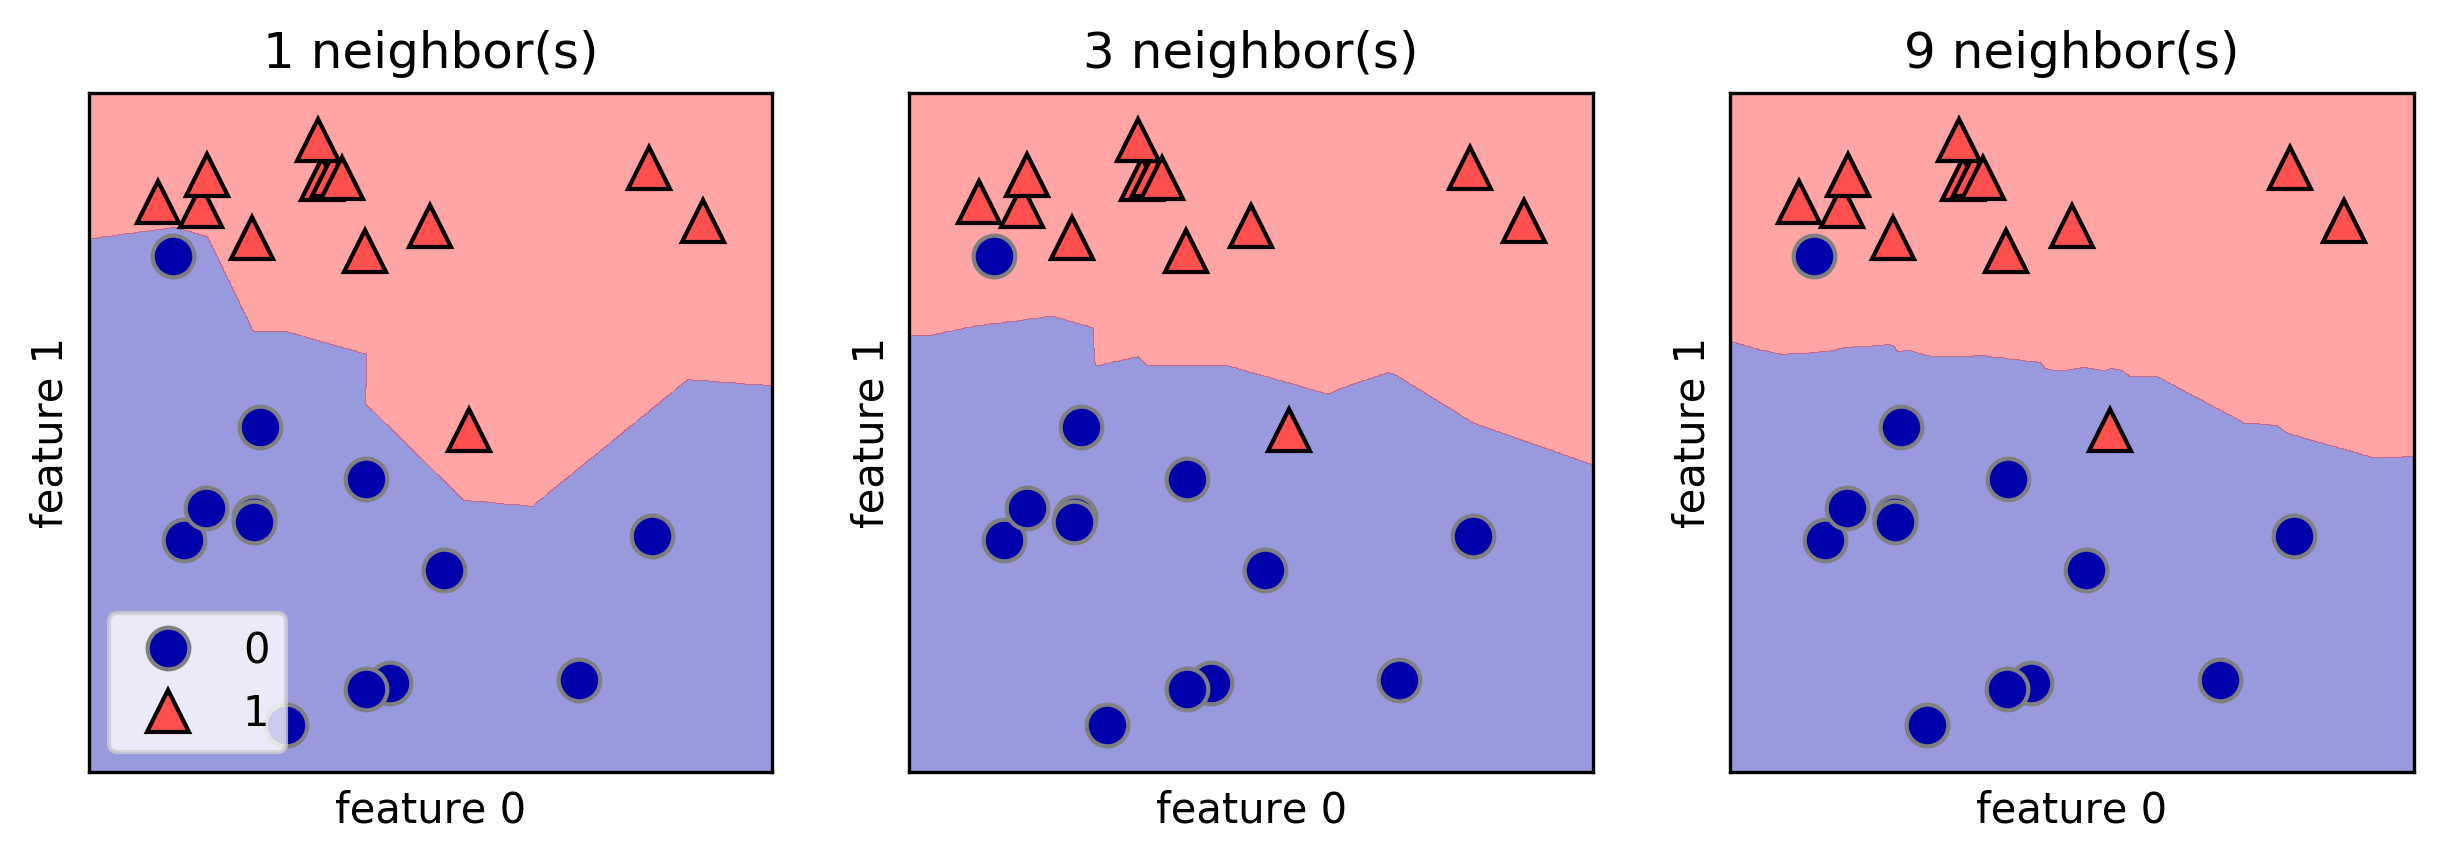

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

- ** more neighbors leads to a smoother boundary **

### Connection between model complexity and generalization

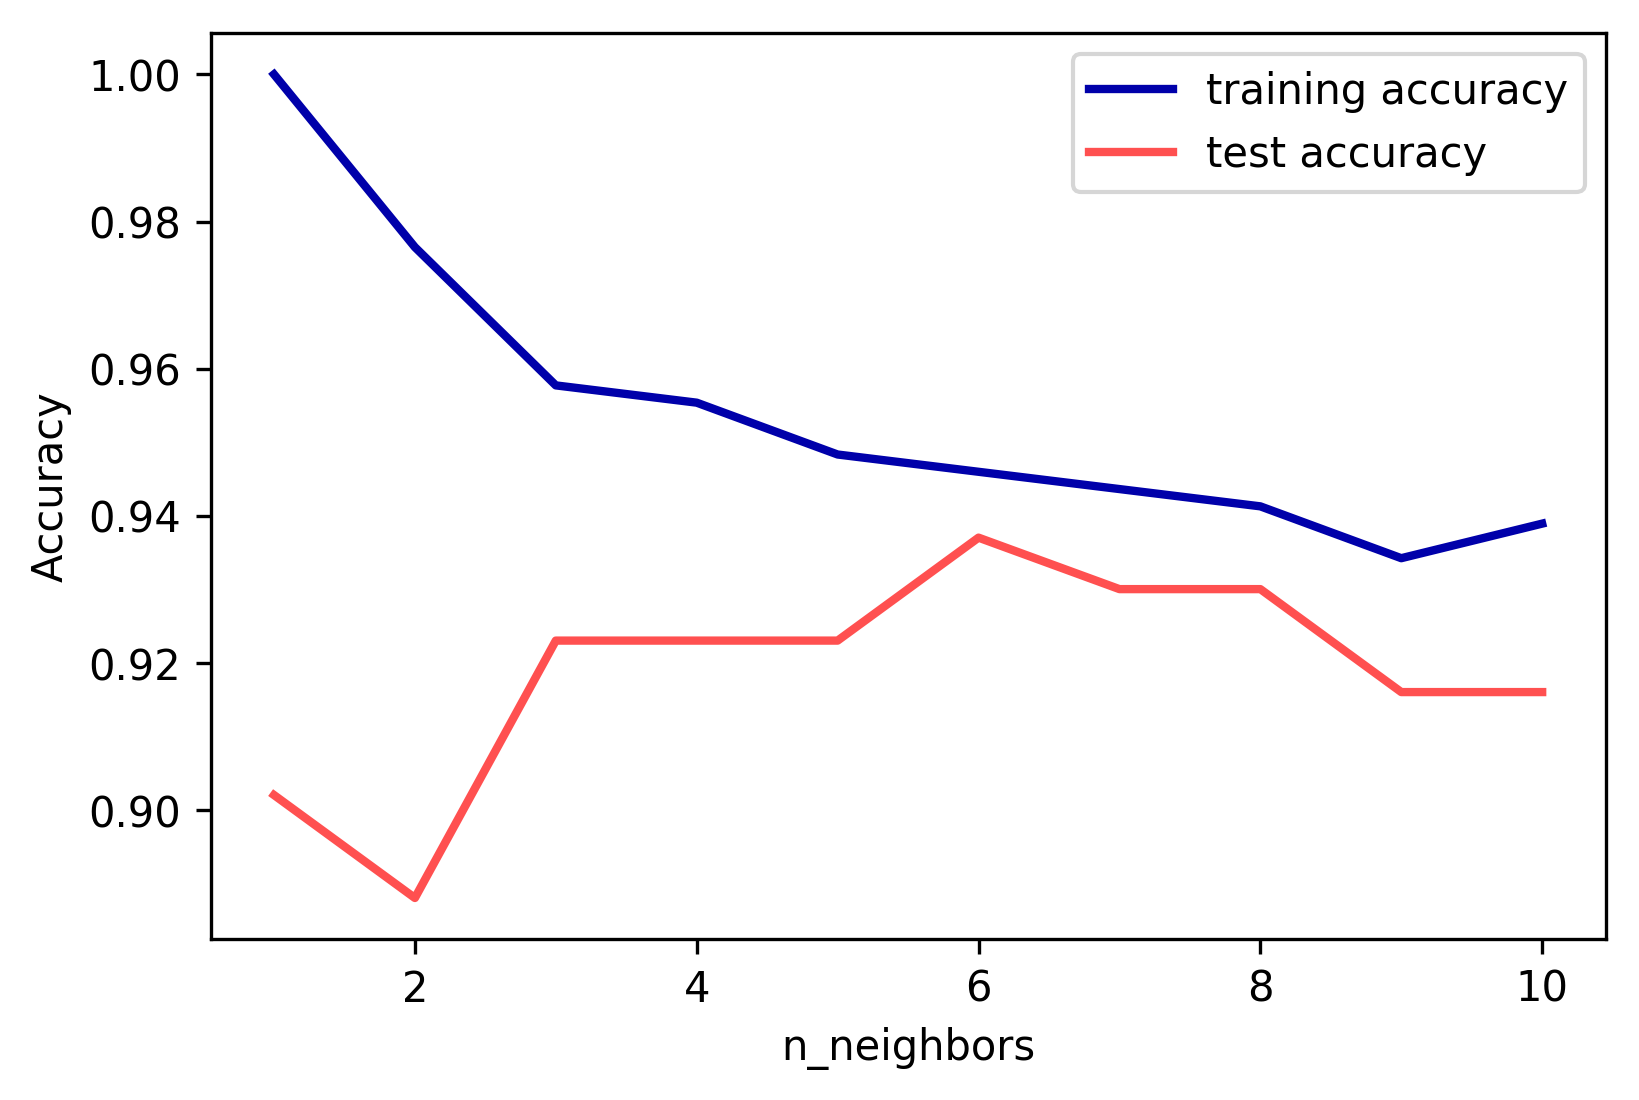

In [66]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66, train_size=0.75)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

- single nearest neighbor -> model is complex -> training accuracy is higher
- 10 neighbors -> model is over simple -> training accuracy drops
- best is at 6

#### k-Neighbors Regression

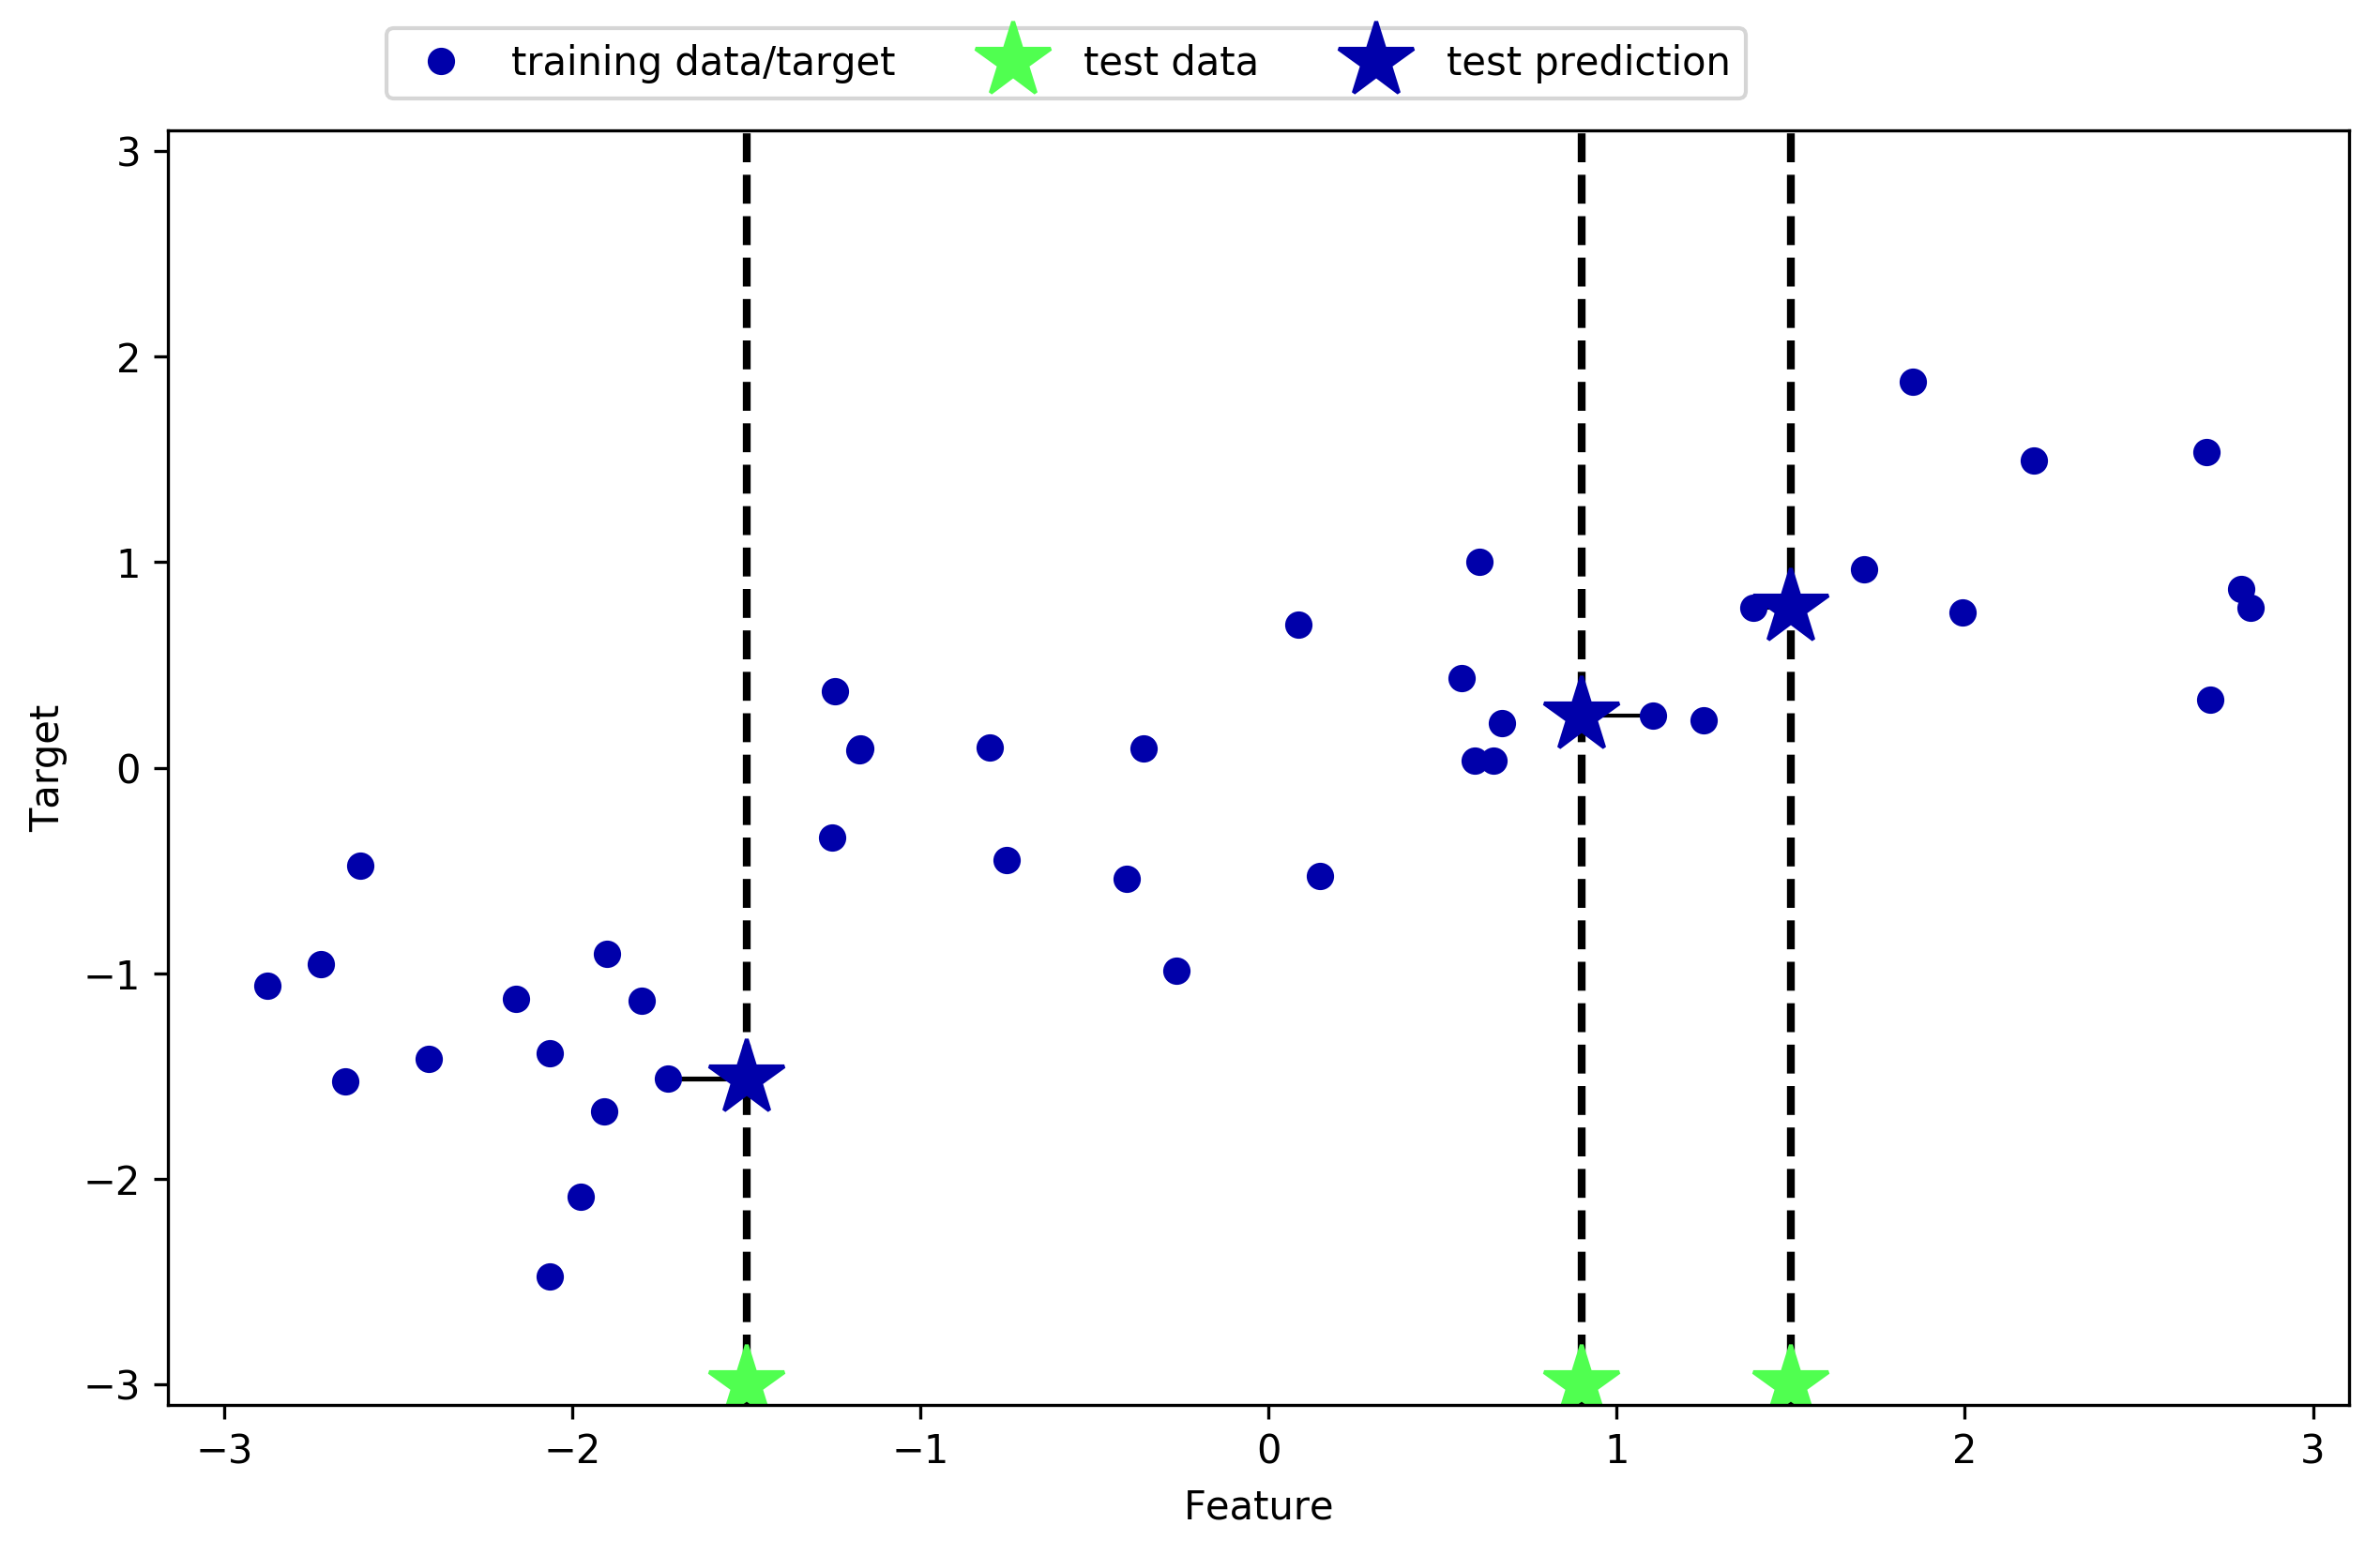

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

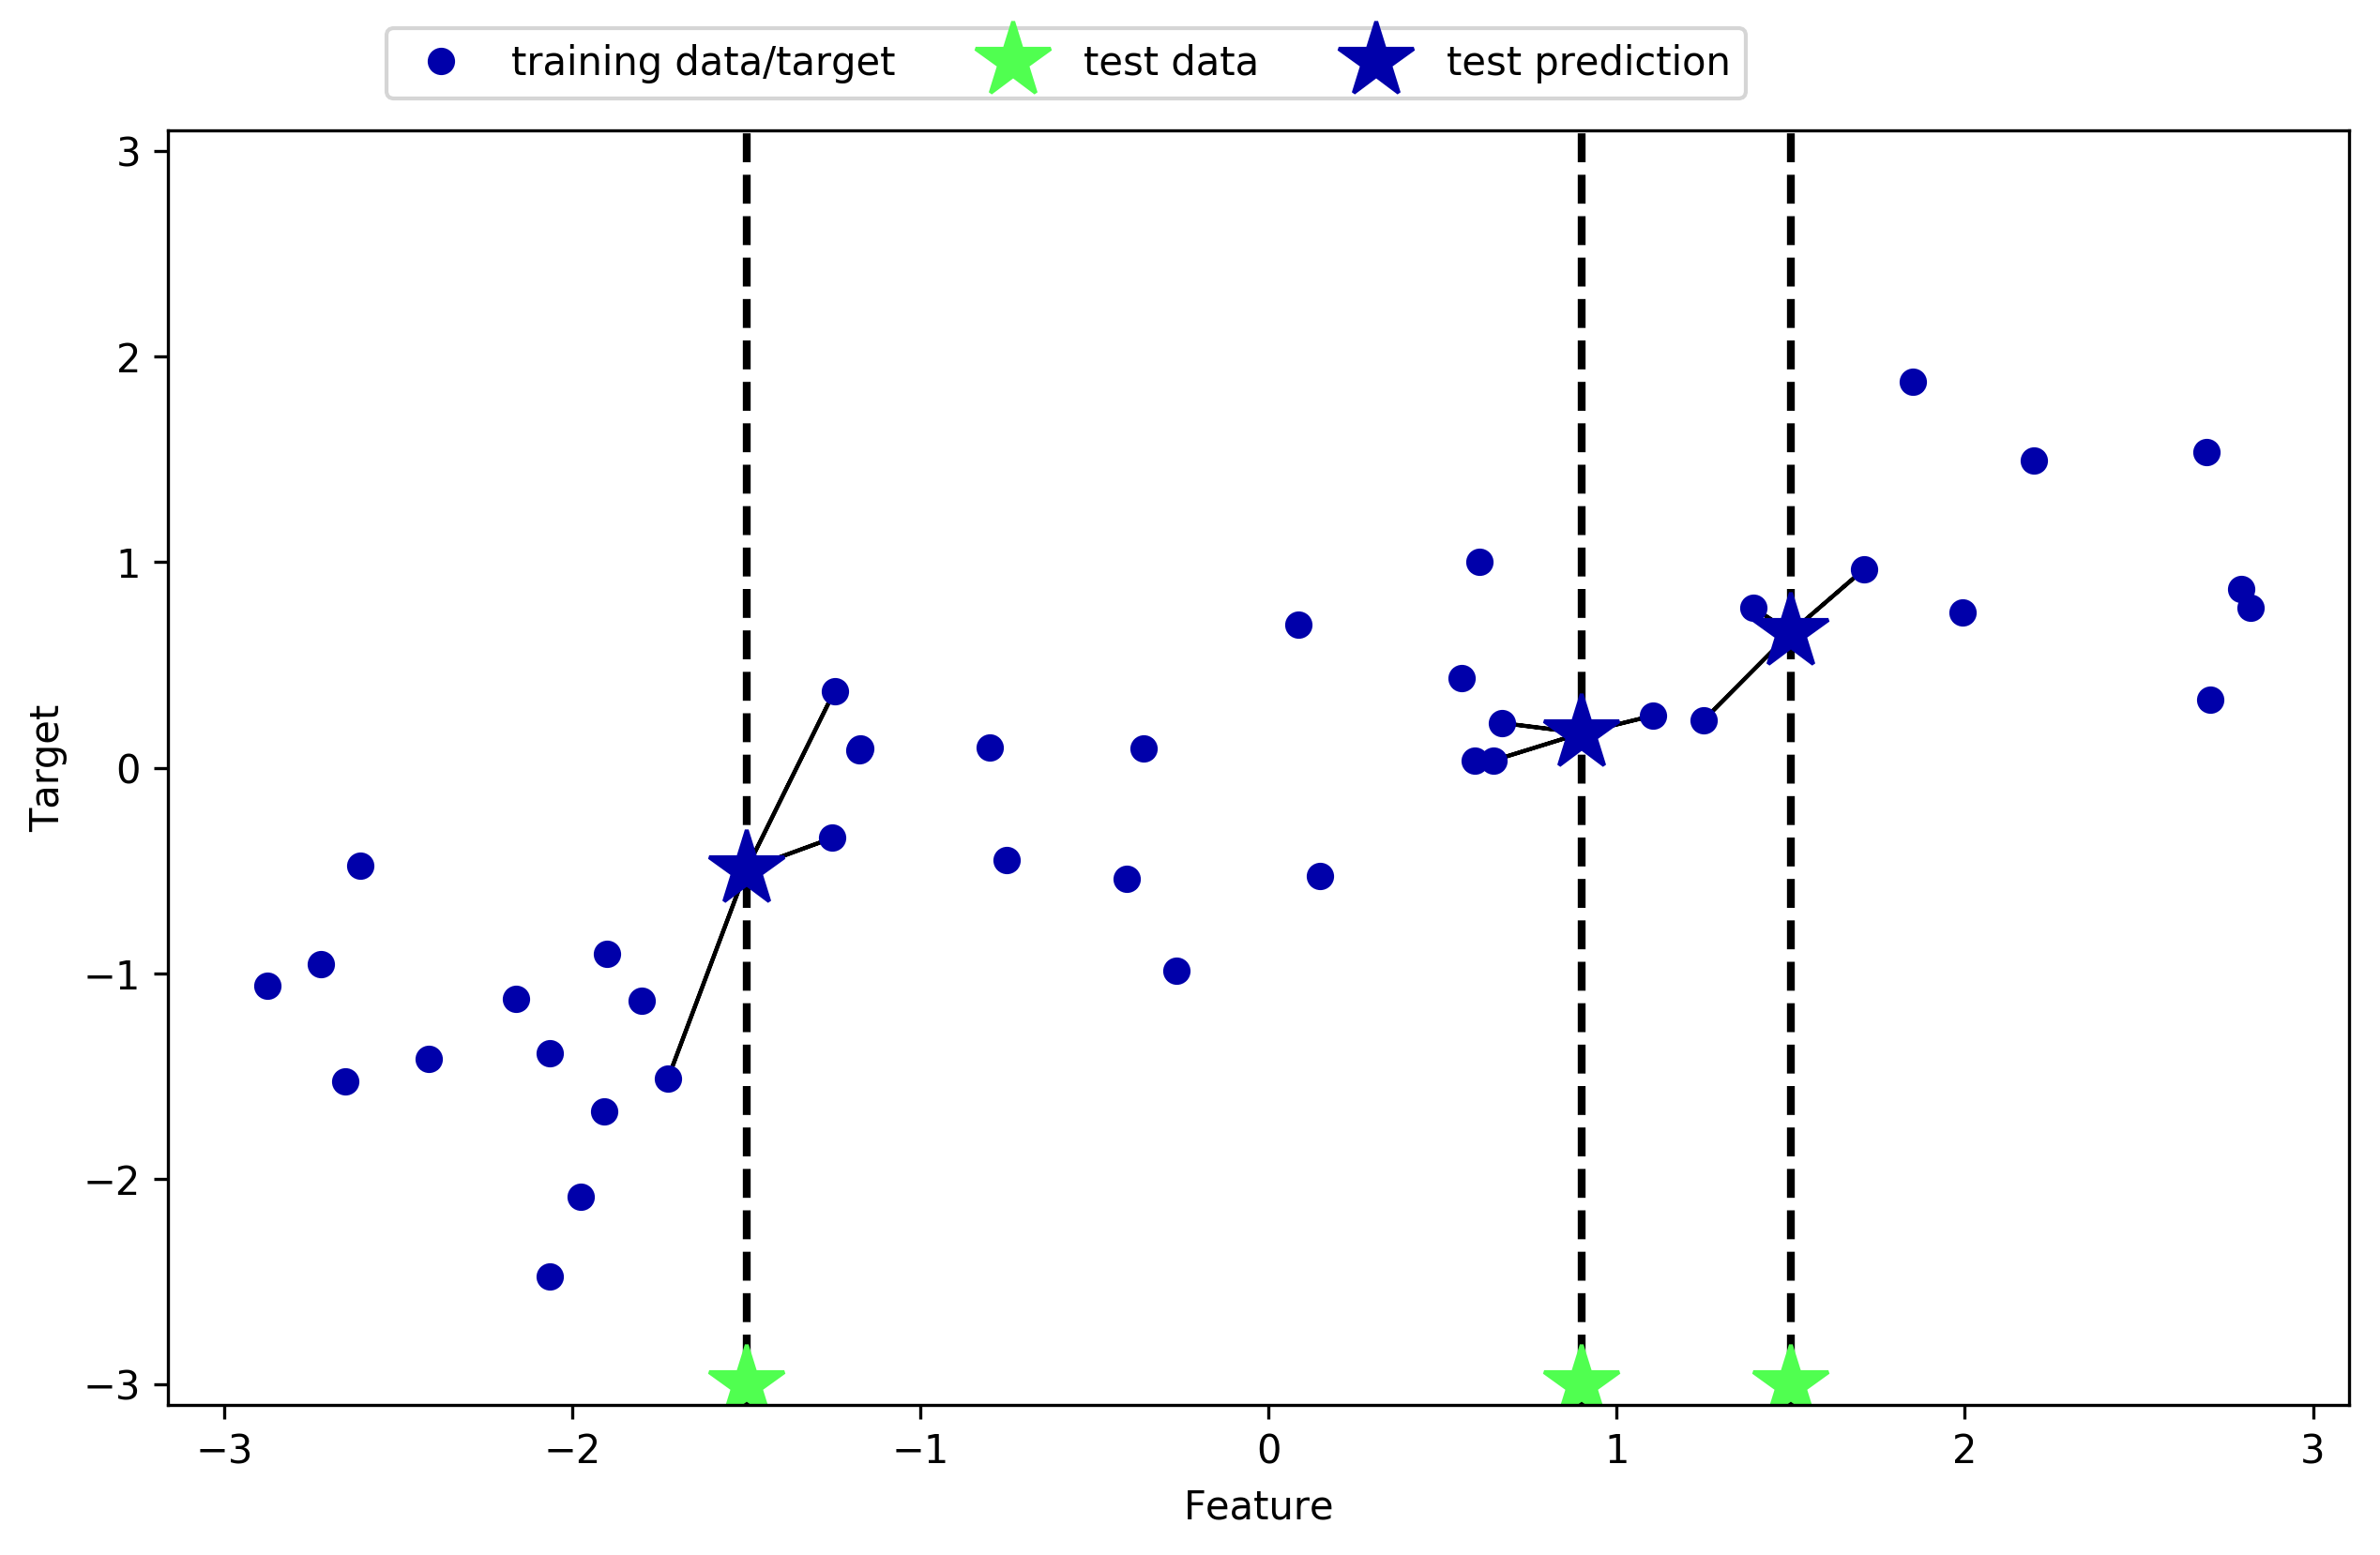

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [68]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [70]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))
#print(X_test)

Test set predictions:
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [75]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
#plt.scatter(y_test,X_test)

Test set R^2: 0.83


#### Analyzing KNeighborsRegressor

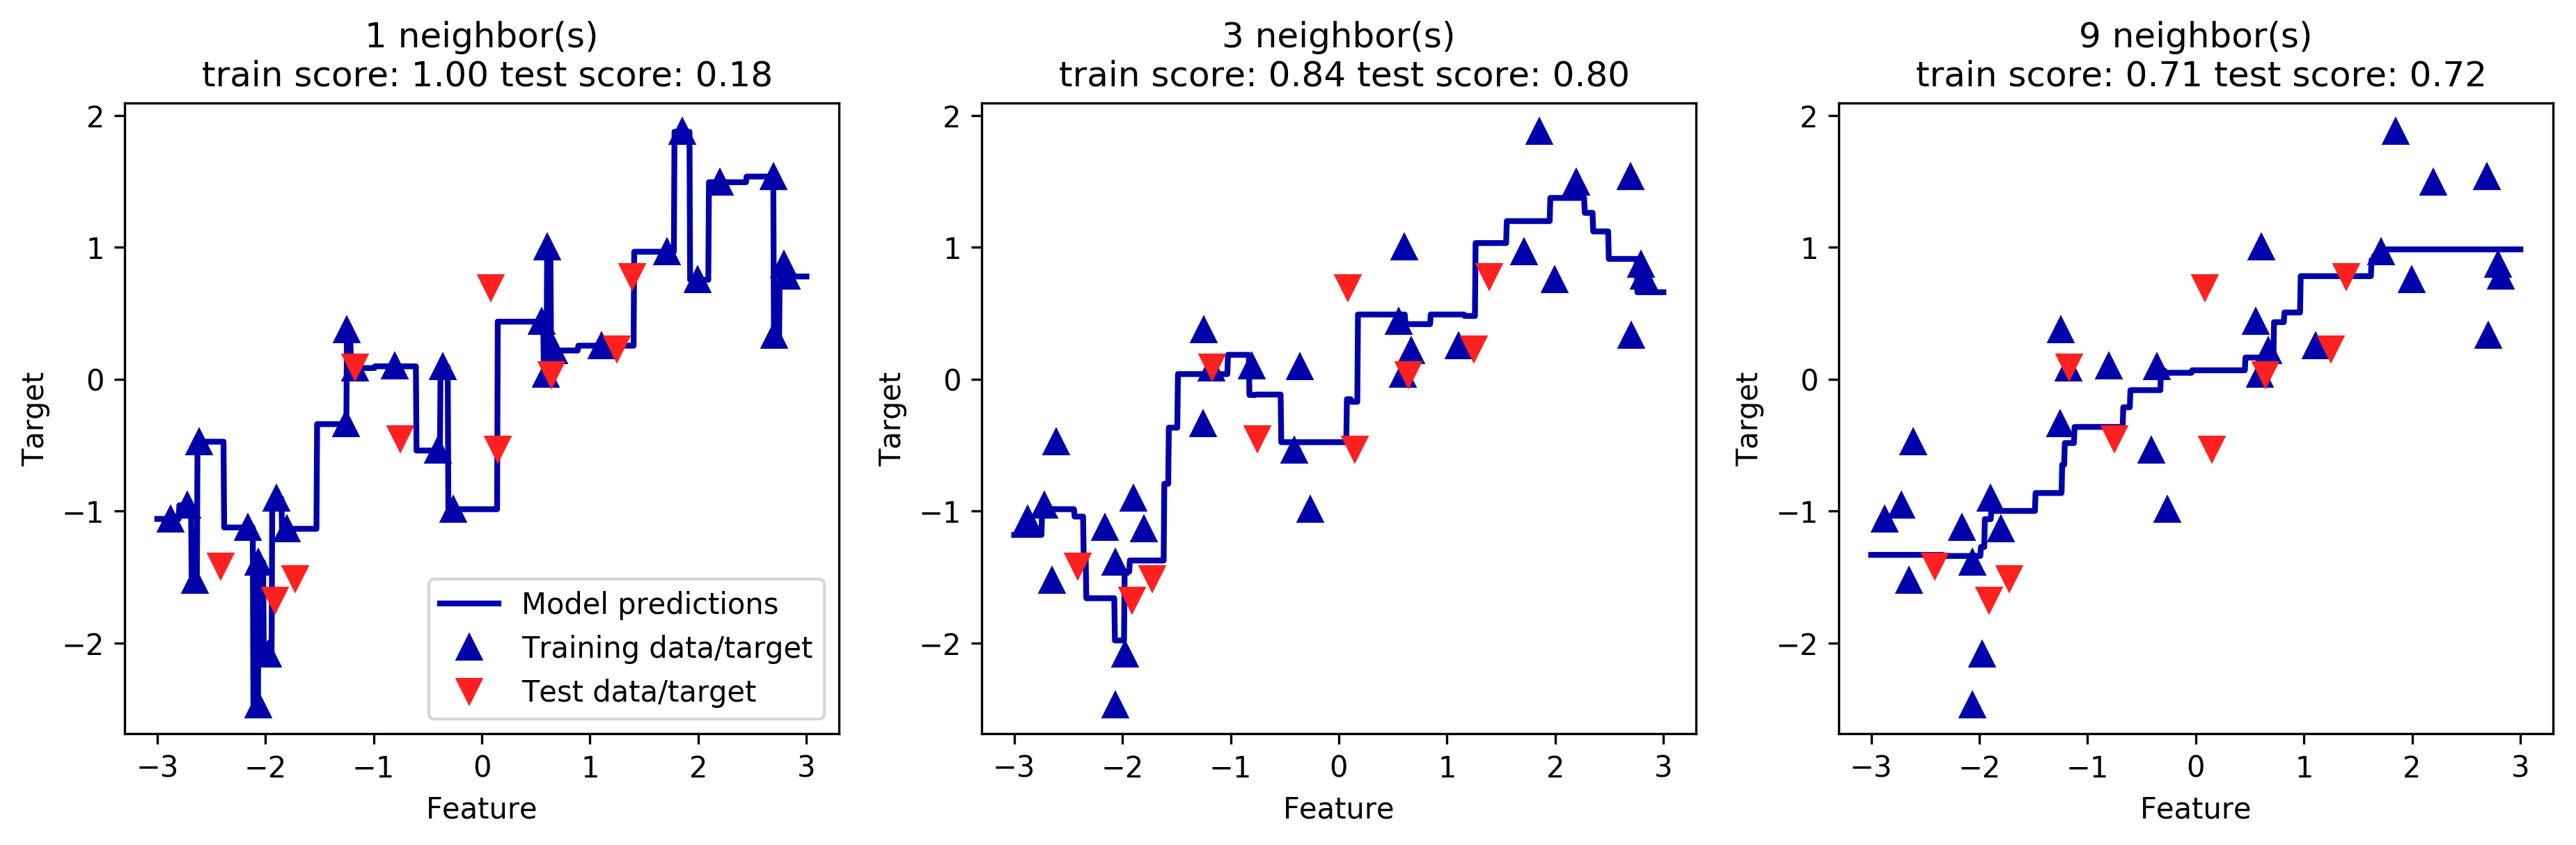

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

##### Strengths, weaknesses, and parameters

**Important feature**
- number of neighbors

**Strengths and Weaknesses**

- very fast. However, slows down when training set is very large.

# KMeans

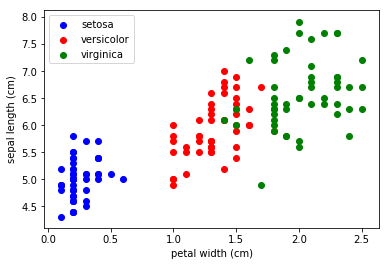

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans


iris = datasets.load_iris()

X = iris.data
y = iris.target

x_index = 3 # petal width
y_index = 0 # sepal length

colors = ['blue', 'red', 'green']
#clt = KMeans(n_clusters=3)
#clt.fit(X,y)
for label, clr in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=clr)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()


In [118]:
k_means = KMeans(n_clusters=3, random_state=10)
X=iris.data[:, [x_index,y_index]]
k_means.fit( X )
y_kmeans = k_means.predict(X)
plt.clf
#ymeans
#X[:,y_index]



<function matplotlib.pyplot.clf>

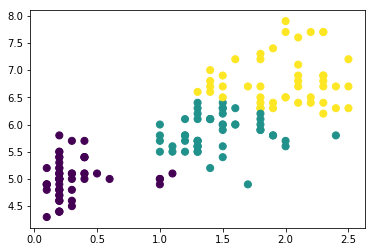

In [119]:
plt.scatter(X[:, 0], X[ : , 1], c=y_kmeans, s=50, cmap='viridis')
#centers = k_means.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [122]:
(y_kmeans==y).sum()/len(y)

0.82666666666666666